<a href="https://colab.research.google.com/github/187it20961/PTDL-HS/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 3**

**Vấn đề 1**

1.Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề

"Missing header in the csv file"

In [1]:
import pandas as pd
import seaborn as sns
df_patientheartrate = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv')
print(df_patientheartrate)

       1    Mickéy Mousé    56       70kgs   72   69   71    -  -.1  -.2
0    2.0     Donald Duck  34.0   154.89lbs    -    -    -   85   84   76
1    3.0      Mini Mouse  16.0         NaN    -    -    -   65   69   72
2    4.0  Scrooge McDuck   NaN       78kgs   78   79   72    -    -    -
3    5.0    Pink Panther  54.0  198.658lbs    -    -    -   69  NaN   75
4    6.0     Huey McDuck  52.0      189lbs    -    -    -   68   75   72
5    7.0    Dewey McDuck  19.0       56kgs    -    -    -   71   78   75
6    8.0      Scööpy Doo  32.0       78kgs   78   76   75    -    -    -
7    NaN             NaN   NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN
8    NaN             NaN   NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN
9    9.0     Huey McDuck  52.0      189lbs    -    -    -   68   75   72
10  10.0    Louie McDuck  12.0       45kgs    -    -    -   92   95   87
11  11.0       Henry Nam   NaN       60kgs   78   75   72    -    -    -
12  12.0     Michel Long  34.0         NaN   65   6

Thêm header vào df_patientheartrate để diễn giải data

In [2]:
column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]
df_patientheartrate = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv', names= column_names)
print(df_patientheartrate)

      ID            Name   Age      Weight m0006 m0612 m1218 f006 f0612 f1218
0    1.0    Mickéy Mousé  56.0       70kgs    72    69    71    -     -     -
1    2.0     Donald Duck  34.0   154.89lbs     -     -     -   85    84    76
2    3.0      Mini Mouse  16.0         NaN     -     -     -   65    69    72
3    4.0  Scrooge McDuck   NaN       78kgs    78    79    72    -     -     -
4    5.0    Pink Panther  54.0  198.658lbs     -     -     -   69   NaN    75
5    6.0     Huey McDuck  52.0      189lbs     -     -     -   68    75    72
6    7.0    Dewey McDuck  19.0       56kgs     -     -     -   71    78    75
7    8.0      Scööpy Doo  32.0       78kgs    78    76    75    -     -     -
8    NaN             NaN   NaN         NaN   NaN   NaN   NaN  NaN   NaN   NaN
9    NaN             NaN   NaN         NaN   NaN   NaN   NaN  NaN   NaN   NaN
10   9.0     Huey McDuck  52.0      189lbs     -     -     -   68    75    72
11  10.0    Louie McDuck  12.0       45kgs     -     -     -   9

**Vấn đề 2**

1.Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột "Name" chứa bao gồm "Firstname" và "Lastname", giải pháp là ta sẽ tách ra làm 2 cột

In [3]:
df_patientheartrate[['Firstname', 'Lastname']]=df_patientheartrate['Name'].str.split(expand = True)
df_patientheartrate.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


Xóa cột name

In [4]:
df_patientheartrate = df_patientheartrate.drop('Name',axis=1)
df_patientheartrate.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


**Vấn đề 3**

1.Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu.Ta sẽ chuyển các đơn vị về thành đơn vị chuẩn "kg"

In [5]:
weight=df_patientheartrate['Weight']
for i in range(len(weight)):
  x = str(weight[i])
  if "lbs" in x[-3:]:
    #remove the lbs from the value
    x = x[:-3]
    float_x = float(x)
    y = int(float_x/2.205)
    y = str(y)+"kgs"
    weight[i] = y
print(df_patientheartrate.head(5))

    ID   Age Weight m0006 m0612 m1218 f006 f0612 f1218 Firstname Lastname
0  1.0  56.0  70kgs    72    69    71    -     -     -    Mickéy    Mousé
1  2.0  34.0  70kgs     -     -     -   85    84    76    Donald     Duck
2  3.0  16.0    NaN     -     -     -   65    69    72      Mini    Mouse
3  4.0   NaN  78kgs    78    79    72    -     -     -   Scrooge   McDuck
4  5.0  54.0  90kgs     -     -     -   69   NaN    75      Pink  Panther


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


**Vấn đề 4**

1.Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là xóa bỏ

In [6]:
df_patientheartrate.dropna(how="all", inplace=True)
df_patientheartrate.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


Khảo sát dữ liệu thiếu và xóa dòng dữ liệu rỗng

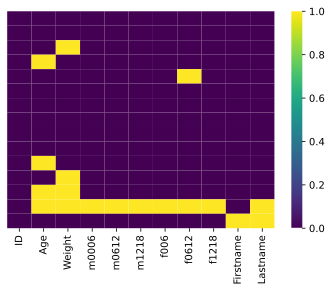

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(df_patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

**Vấn đề 5**

1.Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, weight,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

In [8]:
df_patientheartrate = df_patientheartrate.drop_duplicates(subset=['Firstname','Lastname', 'Age', 'Weight'])
df_patientheartrate.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


**Vấn đề 6**

1.Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII.

In [9]:
df_patientheartrate.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True,inplace=True)
df_patientheartrate.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True,inplace=True)
df_patientheartrate.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


**Vấn đề 7**

"Missing values", vấn đề này xảy ra tại các cột "Age", "Weight" và "Heart Rate". Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ chuyên gia như sau:


"Missing values", vấn đề này xảy ra tại các cột "Age", "Weight" và "Heart Rate". Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ chuyên gia như sau:
a. Deletion: Remove records with missing values

b. Dummy substitution: Replace missing values with a dummy but valid value: e.g.: 0 for numerical values.

c. Mean substitution: Replace the missing values with the mean.

d. Frequent substitution: Replace the missing values with the most frequent item.

e. Improve the data collector: Your business folk will talk to the clients and inform them about why it is worth fixing the problem with the data collector.

Yêu cầu:

Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight
Yêu cầu xử lý dữ liệu thiếu như sau: Nếu dòng nào có Age hoặc Weight có dữ liệu thì phần Age hoặc Weight được tính như bên dưới, nếu thiếu cả 2 thông tin thì xóa dòng o Age: Giá trị thay thế là mean của các giá trị trong cột Age o Weight: Giá trị thay thế là mean của các giá trị trong cột Weight theo nhóm giới tính

In [12]:
index_ageweightnull = df_patientheartrate[df_patientheartrate['Age'].isna() & df_patientheartrate['Weight'].isna()].index
index_ageweightnull

Int64Index([], dtype='int64')

In [11]:
df_patientheartrate.drop(index_ageweightnull, inplace=True)
df_patientheartrate.head(5)

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


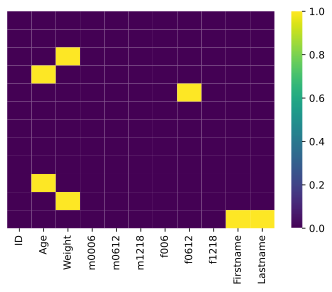

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(df_patientheartrate.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [14]:
df_patientheartrate['Age'].fillna(df_patientheartrate['Age'].mean(), inplace =False)

0     56.0
1     34.0
2     16.0
3     36.1
4     54.0
5     52.0
6     19.0
7     32.0
11    12.0
12    36.1
13    34.0
16    52.0
Name: Age, dtype: float64

**Vấn đề 8**

1."một cột chứa quá nhiều thông tin cần được phân rã", như trong bài toán này ta thấy header "m0006" chứa các nội dung bao gồm: m -> male, 1218 ~ 12-18 (mm-dd). Còn giá trị thì là kết quả huyết áp.

In [17]:
df_patientheartrate

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


Chúng ta sẽ tách nội dung của cột này ra làm 3 cột sau: PulseRate : giá trị huyết áp, Sex: giới tính ( m: male, f: female) và time: thời gian (tháng-ngày) như sau:

In [18]:
df = pd.melt(df_patientheartrate, id_vars=['ID', 'Age', 'Weight', 'Firstname', 'Lastname'], value_name="PulseRate",var_name="sex_and_time").sort_values(['ID', 'Age', 'Weight', 'Firstname', 'Lastname'])

In [19]:

df

,ID,Age,Weight,Firstname,Lastname,sex_and_time,PulseRate
0,1.0,56.0,70kgs,Micky,Mous,m0006,72
12,1.0,56.0,70kgs,Micky,Mous,m0612,69
24,1.0,56.0,70kgs,Micky,Mous,m1218,71
36,1.0,56.0,70kgs,Micky,Mous,f006,-
48,1.0,56.0,70kgs,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
23,15.0,52.0,81kgs,NaN,NaN,m0612,-
35,15.0,52.0,81kgs,NaN,NaN,m1218,-
47,15.0,52.0,81kgs,NaN,NaN,f006,68
59,15.0,52.0,81kgs,NaN,NaN,f0612,75


Extract sex, hour lower bound and hour upper dound group

In [21]:
tmp_df= df["sex_and_time"].str.extract("(\D)(\d+)(\d{2})", expand=True)

In [22]:
tmp_df.head(5)

,0,1,2
0,m,00,06
12,m,06,12
24,m,12,18
36,f,0,06
48,f,06,12


Name columns

In [23]:
tmp_df.columns=["Sex","hours_lower","hours_upper"]

In [24]:
tmp_df.head(5)

,Sex,hours_lower,hours_upper
0,m,00,06
12,m,06,12
24,m,12,18
36,f,0,06
48,f,06,12


Create Time column based on "hours_lower" and "hours_upper" columns

In [30]:
tmp_df["Time"]=tmp_df["hours_lower"] + "-"+ tmp_df["hours_upper"]

In [32]:

tmp_df.head(5)

,Sex,hours_lower,hours_upper,Time
0,m,00,06,00-06
12,m,06,12,06-12
24,m,12,18,12-18
36,f,0,06,0-06
48,f,06,12,06-12


Merge

In [33]:
df =pd.concat([df, tmp_df], axis=1)

In [34]:
df.head(5)

,ID,Age,Weight,Firstname,Lastname,sex_and_time,PulseRate,Sex,hours_lower,hours_upper,Time
0,1.0,56.0,70kgs,Micky,Mous,m0006,72,m,00,06,00-06
12,1.0,56.0,70kgs,Micky,Mous,m0612,69,m,06,12,06-12
24,1.0,56.0,70kgs,Micky,Mous,m1218,71,m,12,18,12-18
36,1.0,56.0,70kgs,Micky,Mous,f006,-,f,0,06,0-06
48,1.0,56.0,70kgs,Micky,Mous,f0612,-,f,06,12,06-12


Drop unnecessary columns and rows

In [35]:
df = df.drop(['sex_and_time','hours_lower','hours_upper'], axis=1)
df = df.dropna()

In [36]:
df.head(5)

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,-,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,-,f,06-12


**Vấn đề 9**

1.Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng phương pháp sau:

-Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2).

-Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3).

-Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4).

-Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5).

-Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6).

-Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định trong y học.

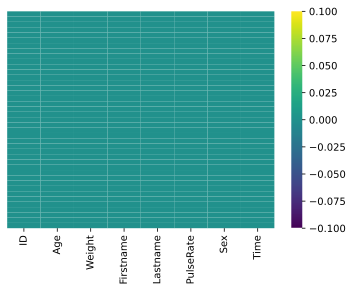

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [38]:
df['PulseRate']= df['PulseRate'].replace({'-' : '0'}, regex=True)
df["PulseRate"].fillna('0', inplace =True)
df.head(5)

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,0,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,0,f,06-12


In [39]:
def avgPulserate(df, firstname):
  sumPulserate = 0
  nsumPulserate = 0
  for i, value in enumerate(df['Firstname']):
    if value == firstname:
      try:
        if df['PulseRate'][i] !='0':
          sumPulserate += int(df['PulseRate'].values[i])
          nsumPulserate += 1
      except:
        pass
  if nsumPulserate > 0:
    return str(sumPulserate/nsumPulserate)
  else:
    return 0

In [40]:

def isValidIndex1(index, nrows):
  return index - 1 > 0 & index + 1 < nrows

In [46]:
def isValidIndex2(index, nrows):
  return index + 1 < nrows & index + 2 < nrows

In [45]:
def isPulseRateNotNull1(index, df):
  return str(df['PulseRate'].values[index-1])!= '0' and str(df['PulseRate'].values[index+1])!= '0'

In [44]:
def isPulseRateNotNull2(index, df):
  return str(df['PulseRate'].values[index+1])!= '0' and str(df['PulseRate'].values[index +2])!= '0'

In [43]:
def isInGroup1(df, index, firstname):
  return df['Firstname'].values[index-1]== firstname and df['Firstname'].values[index +1]== firstname

In [42]:
def isInGroup2(df, index, firstname):
  return df['Firstname'].values[index+1]== firstname and df['Firstname'].values[index +2]== firstname

In [41]:
def updatePulseRatena (index, df):
  nrows = len(df['PulseRate']) -2
  newvalue = ''
  firstname = df['Firstname'].values[index]
  try:
    if isValidIndex1(index,nrows) & isPulseRateNotNull1(index, df) & isInGroup1(df, index, firstname):
      try: 
        newvalue = (int(df['PulseRate'].values[index-1]) + int(df['PulseRate'].values[index+1]))/2
      except:
        newvalue = '0'
    elif isValidIndex2(index,nrows) & isPulseRateNotNull2(index, df) & isInGroup2(df, index, firstname):
      try:
        newvalue = (int(df['PulseRate'].values[index-1]) + int(df['PulseRate'].values[index+1]))/2
      except:
        newvalue ='0'
    else:
      newvalue = avgPulserate(df, firstname)
  except:
      newvalue = avgPulserate(df, firstname)
  finally:
    pass
  return newvalue

In [47]:
pulserateupdate = []
for index, value in enumerate(df["PulseRate"]):
  if value =='0' or value == '':
    newvalue = updatePulseRatena(index,df)
    pulserateupdate.append(newvalue)
  else:
    pulserateupdate.append(value)

In [48]:
df["PulseRateUpdate"] = pulserateupdate

In [49]:
df.head(5)

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time,PulseRateUpdate
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06,72
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12,69
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18,71
36,1.0,56.0,70kgs,Micky,Mous,0,f,0-06,72.0
48,1.0,56.0,70kgs,Micky,Mous,0,f,06-12,72.0


**Vấn đề 10**

1.Hãy rút gọn dữ liệu phù hợp và reindex lại dữ liệu. Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file patient_heart_rate_clean.csv Lưu ý: Ngoài ra còn rất nhiều vấn đề về mặt xử lý dữ liệu dựa trên nhiều khía cạnh khác nhau tùy vào sự am hiểu về dữ liệu của các chuyên gia như:

Handling dates

Correcting character encodings (a problem you hit when you scrape data off the web)


In [ ]:

from google.colab import drive
drive.mount('/drive')

Mounted at /drive

In [ ]:
df.to_csv('/drive/My Drive/DataAnalyst/patient_heart_rate_clean.csv')